In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# função que calcula e retorna o teste t parametrico 
def pvalue_rel(score_1, score_2):
  aux = stats.ttest_rel(score_1, score_2)
  return aux.pvalue

# função que calcula e retorna o teste t não parametrico 
def pvalue_wilcoxon(score_1, score_2):
  w,p = stats.wilcoxon(score_1, score_2) # , zero_method='pratt'
  return p

In [1]:
 prof_GS = [1214.0, 759.5, 1164.25, 977.25, 1201.0, 930.0, 1427.75, 799.5, 1006.25, 783.5, 728.5, 419.25, 1389.5, 730.0, 1306.25, 675.5, 1359.5, 1000.25, 1284.5, 1350.0, 751.0, 1418.75, 1276.5, 1645.75, 860.0, 745.5, 1426.25, 783.5, 1149.75, 1482.25]

 meu_GA = [1089.5, 210.0, 219.0, 1113.75, 1200.5, 1262.25, 287.0, 331.25, 181.0, 226.0, 1609.75, 111.25, 168.75, 183.0, 1068.0, 337.25, 941.5, 163.5, 136.75, 465.5, 1123.25, 1264.25, 276.75, 1196.5, 296.75, 1145.5, 1133.5, 117.0, 1135.75, 1139.75]

In [4]:
prof_RB = [205.25, 1185.0, 78.25, 1128.0, 62.25, 1344.5, 80.75, 902.0, 1053.5, 1099.25, 38.0, 148.0, 1242.5, 1122.75, 829.0, 953.25, 1100.5, 1323.5, 1242.5, 1233.75, 1186.75, 1115.25, 1114.0, 106.75, 516.0, 38.75, 1222.25, 101.75, 206.75, 1412.0] 

meu_RB = [1206.0, 1291.25, 899.75, 1619.5, 1240.75, 979.0, 1305.25, 1255.5, 1341.5, 525.5, 1100.5, 1252.0, 1090.0, 1260.5, 1024.0, 1327.25, 1088.5, 1055.5, 1419.25, 1193.0, 1277.25, 1250.75, 1255.0, 1093.75, 1222.5, 1328.0, 1187.0, 1018.0, 1384.5, 977.0]

In [11]:
import numpy as np

npRes = np.asarray(meu_GA)
print('\nmean results:', npRes.mean(), '\nstd results:', npRes.std(), '\nmean - std', npRes.mean() - npRes.std())


mean results: 671.15 
std results: 484.46238932105626 
mean - std 186.6876106789437


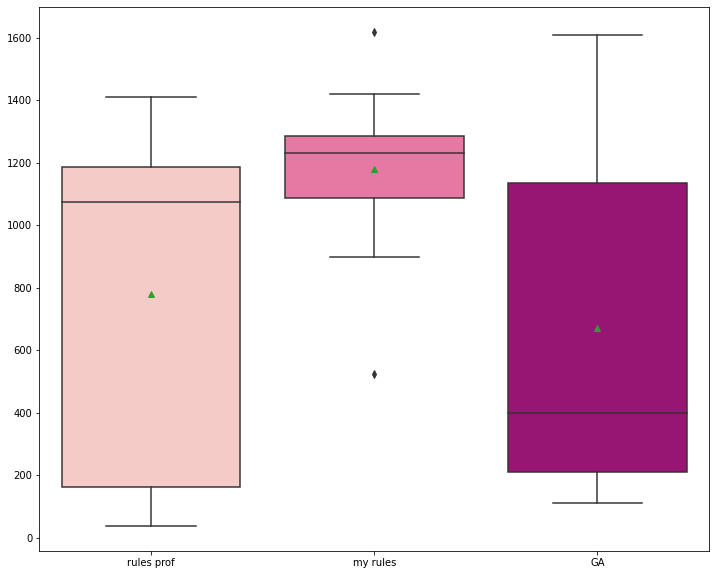

In [7]:
plt.figure(figsize=(12, 10))

ax = sns.boxplot(data=[prof_RB, meu_RB, meu_GA], palette='RdPu', showmeans=True)

ax.set_xticks([0,1, 2])
ax.set_xticklabels(['rules prof', 'my rules', 'GA'])

plt.show()

In [13]:
import pandas as pd

# Definição das colunas da Tabela pareada 
c1 = ['rules prof', pvalue_rel(prof_RB, meu_RB), pvalue_rel(prof_RB, meu_GA)]
c2 = [pvalue_wilcoxon(prof_RB, meu_RB), 'my rules', pvalue_rel(meu_RB, meu_GA)]
c3 = [pvalue_wilcoxon(prof_RB, meu_GA), pvalue_wilcoxon(meu_RB, meu_GA), 'GA']


table = pd.DataFrame(data={'0': c1, '1':c2, '3':c3})
table

,0,1,3
0,rules prof,0.001484,0.382034
1,0.000423,my rules,0.000115
2,0.441532,0.000008,GA
